In [3]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random


In [4]:
# %%bash
# gdown https://drive.google.com/uc?id=1DVXZZTunBgJLJBLQa34gordxZdkAuTVr
# unzip dogs_atoms_imagenet.zip > /dev/null

!pwd

/home/psuresh/Desktop/VGG-19-Image-Classification


In [14]:
# reading files from the given path
data_path = "/data/*.jpg"

In [15]:
# define the model
model = VGG19(weights='imagenet', include_top=True)

# load the labels from image_net
labels = np.load('labels/imagenet_labels.npy', allow_pickle=True)[()]

In [9]:
def predict_vgg_19(img):
    # make image ready into array, preprocessing
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # predict from the vgg-19 model
    preds = model.predict(x)
    
    # find the top 1 class
    idx = (-preds).argsort()[:,:1]   
    
    # split comma and pick first one
    pred_label = str(labels[idx[0][0]].split(',')[0])
  
    return pred_label

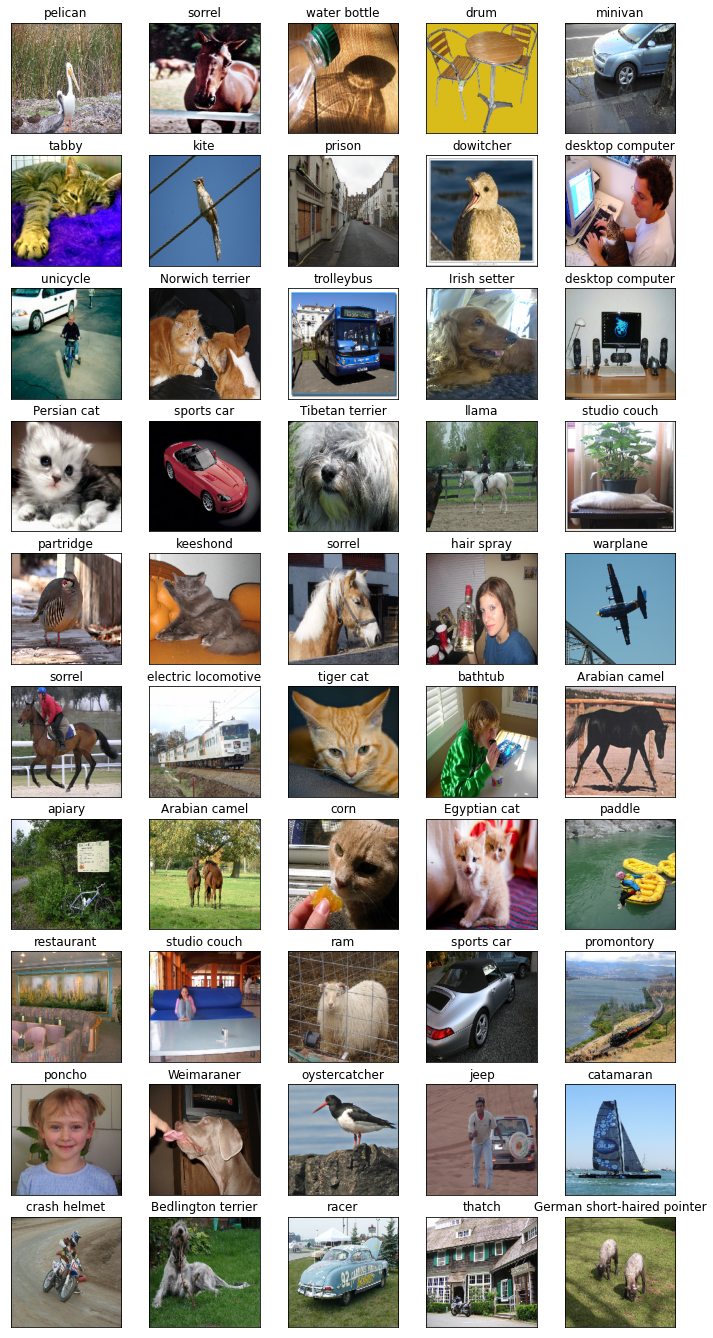

In [24]:
# list all the jpg images from given path
images_all = glob.glob("data/*.jpg")

# select 50 images randomly
images = random.sample(population=images_all, k=50)

# define a figure of size 12,12
fig = plt.figure(figsize = (12, 24))

# define rows and columns
rows = 10
cols = 5

for i in range(1,rows*cols+1):
    # load image from the given path and resize to (224,224)
    img = image.load_img(images[i-1], target_size = (224,224))
    
    # pass the loaded image and get predicted label
    label = predict_vgg_19(img)
#     print(label)
    
    # add image to subplot
    ax = fig.add_subplot(rows,cols,i)
    ax.set_title(label)
    plt.imshow(img)
    
    # disable x,y ticks
    plt.xticks([])
    plt.yticks([])
plt.show()

The vgg-19 was trained on 1000 classes. Here, we are just testing the different images on pretrained vgg-19. The label of the voc dataset is unconsistent with the labels of vgg-19. So, I am counting manually how many labels are predicted correctly in 50 given images.

Total Images: 50
Correctly Classified: 38
Incorrectly Classified: 12
Accuracy = 38/50 = 76%